In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import linear_model
import holidays
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from scipy.stats import probplot
from scipy import stats
import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/silvialee/Desktop/DataSources/ISOM672/hotel_booking.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


## 1. Explore Data

In [3]:
num_rows, num_cols = df.shape
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 119390 rows and 36 columns.


In [4]:
def explore_data(df):
    print("------------------------first 5 rows---------------------------------------------")
    print(df.head())    # first 5 rows
    print("------------------------datatype info---------------------------------------------")
    print(df.info())    # datatype info
    print("------------------------statistics describe---------------------------------------------")
    print(df.describe())    # statistics describe
    print("------------------------sum of missing values in each column---------------------------------------------")
    print(df.isna().sum())    # sum of missing values in each column
explore_data(df)

------------------------first 5 rows---------------------------------------------
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0 

there are many outliers and missing values that we need to clean up later

In [5]:
# clarify hotel is city hotel and not reserve hotel
df = df[df['hotel'] == 'City Hotel']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,Transient,0.00,0,0,Check-Out,2015-07-03,Elizabeth Ross,Ross.Elizabeth@att.com,313-076-6204,************4378
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,Transient,76.50,0,1,Canceled,2015-07-01,Adam Aguilar,AAguilar@comcast.net,796-281-4143,************2797
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,Transient,68.00,0,1,Canceled,2015-04-30,Mark Keller,Mark_Keller@hotmail.com,227-821-0234,************9384
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,Transient,76.50,0,2,Canceled,2015-06-23,Sarah Scott,SScott88@aol.com,443-817-6604,************7979
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,Transient,76.50,0,1,Canceled,2015-04-02,Misty Perry,Misty.P68@att.com,801-946-4619,************4844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


### 1.1 Drop irrelevant features to our prediction at all columns each row
- Customer’s personal information: name, email, phone, credit card, country
- 3rd party: company, agent

In [6]:
df.drop(["name", "email", "phone-number", "credit_card", "country", "company", "agent"], axis=1 ,inplace=True) 
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


### 1.1 drop features that might lead to data leakage all columns each row
- post-booking information that's not helpful for predicting if the next customer canceled reservation or not 
    - 'days_in_waiting_list' may include customers who are still in the waiting list or got dropped aka canceled
    - 'reservation_status' contains post-booking information such as 'Check-Out'
    - 'reservation_status_date' contains post-booking information
    - 'booking_changes' contains post-booking information

In [7]:
df.drop(["days_in_waiting_list", "reservation_status", "reservation_status_date", "booking_changes"], axis=1, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,0,0,A,A,No Deposit,Transient,0.00,0,0
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,0,0,A,A,No Deposit,Transient,76.50,0,1
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0,0,0,A,A,No Deposit,Transient,68.00,0,1
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,0,0,0,A,A,No Deposit,Transient,76.50,0,2
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0,0,0,A,A,No Deposit,Transient,76.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,0,A,A,No Deposit,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,0,E,E,No Deposit,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,0,D,D,No Deposit,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,0,A,A,No Deposit,Transient,104.40,0,0


## drop outliers and missing values
- drop variable with most outliers and insignificant outliers from context

In [8]:
# identify outliers
def detect_outliers(df, threshold=3):
    mean = np.mean(df)
    std = np.std(df)
    z_scores = np.abs((df - mean) / std)
    return df[z_scores > threshold]

# Applying the function to each numerical column in the DataFrame
outliers = {}
for column in df.select_dtypes(include=[np.number]).columns:
    outlier_values = detect_outliers(df[column])
    if not outlier_values.empty:
        outliers[column] = outlier_values

# Print the outliers found in each column
for column, outlier_values in outliers.items():
    print(f"Outliers in {column}:\n{outlier_values}\n")

Outliers in lead_time:
50330     443
50331     443
50332     443
50333     443
50334     443
         ... 
119102    518
119107    518
119109    518
119111    518
119148    457
Name: lead_time, Length: 1148, dtype: int64

Outliers in stays_in_weekend_nights:
40114     5
40115     5
40116     5
40290     4
40559     4
         ..
118570    4
118613    4
118673    4
119083    4
119260    4
Name: stays_in_weekend_nights, Length: 423, dtype: int64

Outliers in stays_in_week_nights:
40113      8
40114     15
40115     15
40116     15
40123      8
          ..
119255     7
119260     8
119292     8
119369     7
119389     7
Name: stays_in_week_nights, Length: 719, dtype: int64

Outliers in adults:
40392     0
40922     0
40984     0
41020     0
41048     0
         ..
117453    0
117921    4
118200    0
118480    4
118911    4
Name: adults, Length: 421, dtype: int64

Outliers in children:
40132     2.0
40597     2.0
40779     2.0
40818     2.0
40847     2.0
         ... 
119247    2.0
119251

In [9]:
# drop adr outliers that seems insignificant to context
df.loc[ df.adr < 0, 'adr'] = np.NaN
df.loc[ df.adr > 1000, 'adr'] = np.NaN

In [10]:
# final check null values
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [11]:
# final check null values -- decided to drop children and adr null values bc insignificant
df.dropna(axis=0, inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

### 1.2 Convert Data Types

In [12]:
# initial data type
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [13]:
# convert children column to integer
df['children'] = df['children'].astype(int)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces       

"arrival_date_month" is a object bc values are "january", "february", etc -- change it to numerical then change type to integer

#### Categorical to ordinal numerical data

In [14]:
# covert categorical to ordinal to match arrival_date_year
df['arrival_date_month'] = df['arrival_date_month'].replace({'January' : 1, 'February': 2, 'March':3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})
df['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [15]:
# convert "arrival_date_month" from object into integer
df["arrival_date_month"] = df["arrival_date_month"].astype(int)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces       

#### check categorical variables -- see if we can convert them to a dummy variable

In [16]:
df[["meal", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type"]]

,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
40060,HB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
40061,BB,Online TA,TA/TO,A,A,No Deposit,Transient
40062,BB,Online TA,TA/TO,A,A,No Deposit,Transient
40063,BB,Online TA,TA/TO,A,A,No Deposit,Transient
40064,BB,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...
119385,BB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,BB,Online TA,TA/TO,E,E,No Deposit,Transient
119387,BB,Online TA,TA/TO,D,D,No Deposit,Transient
119388,BB,Online TA,TA/TO,A,A,No Deposit,Transient


### Categorical to Nominal -- one hot encoding to prevent error from normalize process
- one hot encoding
    - reduce multicollinearity errors
    - prevent errors during normalizing process from numerical operations to categorical variables
    - nominal data is more suitable for one hot encoding over ordinal data used in label encoding

In [17]:
df=pd.get_dummies(df, columns=["hotel", "meal", "market_segment", "distribution_channel", "deposit_type", "customer_type"], drop_first=True)
df
# "reserved_room_type" and "assigned_room_type" are not included even though they are categorical variables due to feature engineering issues

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
40060,0,6,2015,7,27,1,0,2,1,0,...,True,False,False,False,True,False,False,False,True,False
40061,1,88,2015,7,27,1,0,4,2,0,...,False,True,False,False,True,False,False,False,True,False
40062,1,65,2015,7,27,1,0,4,1,0,...,False,True,False,False,True,False,False,False,True,False
40063,1,92,2015,7,27,1,2,4,2,0,...,False,True,False,False,True,False,False,False,True,False
40064,1,100,2015,7,27,2,0,2,2,0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0,...,True,False,False,False,True,False,False,False,True,False
119386,0,102,2017,8,35,31,2,5,3,0,...,False,True,False,False,True,False,False,False,True,False
119387,0,34,2017,8,35,31,2,5,2,0,...,False,True,False,False,True,False,False,False,True,False
119388,0,109,2017,8,35,31,2,5,2,0,...,False,True,False,False,True,False,False,False,True,False


#### final data types check -- check to see if there are no categorical variables left to prevent normalization errors

In [18]:
df.dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
meal_FB                              bool
meal_HB                              bool
meal_SC                              bool
market_segment_Complementary         bool
market_segment_Corporate          

## 2.Modeling
- original data & fixed parameters VS hot encoded data & hyper parameter tuning

In [19]:
# Seed generator -> ensure reproducibility; notebook's output stable across runs (the same result every time the code is run)
np.random.seed(42)

In [20]:
# k fold cross validation with shuffling -- good for randomizing data before creating folds
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
# Define features and target variables in dataset
X = df.drop(columns = ['is_canceled'])
Y = df['is_canceled']

In [22]:
# stratify cross validation to prevent overfitting as much as possible
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.3, stratify = Y) 

In [23]:
X_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
71338,46,2017,7,27,3,1,0,2,0,0,...,False,True,False,False,True,False,False,False,True,False
103100,278,2016,12,50,9,1,2,2,0,0,...,False,True,False,False,True,False,False,False,True,False
43645,28,2015,9,39,21,1,4,2,0,0,...,True,False,False,False,True,False,False,False,True,False
100980,110,2016,11,45,2,0,3,1,0,0,...,False,True,False,False,True,False,False,False,True,False
111562,123,2017,5,19,8,1,4,2,0,0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84617,43,2016,2,9,25,2,3,2,2,0,...,False,True,False,False,True,False,False,False,True,False
75512,355,2015,10,41,7,0,2,2,0,0,...,False,False,False,False,True,True,False,False,False,True
55362,398,2016,8,33,11,0,2,2,0,0,...,False,False,False,False,True,True,False,False,True,False
101855,1,2016,11,47,18,0,1,2,0,0,...,False,True,False,False,True,False,False,False,True,False


In [24]:
X_train.columns


Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'meal_FB', 'meal_HB', 'meal_SC',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party'],
      dtype='object')

### 2.1 Original Data (wihtout one hot encoding) & Fixed parameters

In [25]:
# drop features that we are going to use for feature engineering later
    # shows impact of feature engineering later -- compare performance against this baseline (not including those features)
    # avoid redundancy -- if I am combining 'arrival_date_year', 'arrival_date_month', and 'arrival_date_day_of_month' into 'date',
                        # then keeping those features in this step is redundant and might lead to multicollinearity 
X_train_original = X_train.drop(columns =['arrival_date_year', 'arrival_date_month',
                                        'arrival_date_week_number', 'arrival_date_day_of_month', 'reserved_room_type',
                                        'assigned_room_type'])


In [28]:
################################### kNN #########################################
pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))), # Normalize Data to 0~1
        ('knn', KNeighborsClassifier(p=2, metric='minkowski'))
      ])
pipe.fit(X_train_original,Y_train)

knn_original_score = cross_val_score(pipe, X_train_original, 
                                     Y_train, cv = 10, 
                                     scoring = "f1")  # f1 balances precision and recall -- providing a more comprehension view of model performance
print("kNN f1: %0.2f (+/- %0.2f)" % (knn_original_score.mean(), knn_original_score.std()))

################################### Decision Tree ################################
dt_original_score = cross_val_score(DecisionTreeClassifier(max_depth = 10),
                                    X_train_original,
                                    Y_train,
                                    cv=10,
                                    scoring="f1")
print("Decision Tree f1: %0.2f (+/- %0.2f)" % (dt_original_score.mean(), dt_original_score.std()))

################################### Logistic Regression ################################
logistic_original_score = cross_val_score(LogisticRegression(),
                                          X_train_original,
                                          Y_train,
                                          cv=10,
                                          scoring="f1")
print("Logistic Regression f1: %0.2f (+/- %0.2f)" % (logistic_original_score.mean(), logistic_original_score.std()))

kNN f1: 0.77 (+/- 0.01)
Decision Tree f1: 0.76 (+/- 0.01)
Logistic Regression f1: 0.72 (+/- 0.01)


### 2.2 Feature Engineering (Create new features + log or sqrt transformations) + Hyperparameter tuning
- apply the same feature engineering in both the training and test sets to maintain consistency to ensure that the training model is tested on data that has the same features
   

#### 2.2. Feature Engineering (create new features)

In [29]:
################################### Train #########################################
def new_features(X):
    X_train_original_fe = X_train.copy()
    
    # Create new column "date" by concatenating "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"
    X_train_original_fe["date"] = pd.to_datetime(X_train_original_fe["arrival_date_year"].astype(str) + '-' +
                                              X_train_original_fe["arrival_date_month"].astype(str) + '-' +
                                              X_train_original_fe["arrival_date_day_of_month"].astype(str))

    # Create new column "is_holiday" out of "date" column 
    us_holidays = holidays.US()
    def is_holiday_check(date):
        return date in us_holidays

    X_train_original_fe["is_holiday"] = X_train_original_fe["date"].apply(is_holiday_check)

    # Create new column "is_weekend" out of "date" column 
    def is_weekend_check(date):
        if datetime.datetime.weekday(date) < 5:
            return False
        else: 
            return True

    X_train_original_fe["is_weekend"] = X_train_original_fe["date"].apply(is_weekend_check)
    
    # Create new column "got_reserved_room" out of "assigned room type" and "reserved room type"
    X_train_original_fe["got_reserved_room"] = X_train_original_fe["reserved_room_type"] == X_train_original_fe["assigned_room_type"]
    
    # drop features that were used for feature engineering
    X_train_original_fe.drop(["date", "reserved_room_type", "assigned_room_type", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)
    return X_train_original_fe

################################### Test #########################################
def new_features2(X):
    X_test_fe = X_test.copy()
    
    # Create new column "date" by concatenating "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"
    X_test_fe["date"] = pd.to_datetime(X_test_fe["arrival_date_year"].astype(str) + '-' +
                                              X_test_fe["arrival_date_month"].astype(str) + '-' +
                                              X_test_fe["arrival_date_day_of_month"].astype(str))

    # Create new column "is_holiday" out of "date" column 
    us_holidays = holidays.US()
    def is_holiday_check(date):
        return date in us_holidays

    X_test_fe["is_holiday"] = X_test_fe["date"].apply(is_holiday_check)

    # Create new column "is_weekend" out of "date" column 
    def is_weekend_check(date):
        if datetime.datetime.weekday(date) < 5:
            return False
        else: 
            return True

    X_test_fe["is_weekend"] = X_test_fe["date"].apply(is_weekend_check)
    
    # Create new column "got_reserved_room" out of "assigned room type" and "reserved room type"
    X_test_fe["got_reserved_room"] = X_test_fe["reserved_room_type"] == X_test_fe["assigned_room_type"]
    
    # drop features that were used for feature engineering
    X_test_fe.drop(["date", "reserved_room_type", "assigned_room_type", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)
    return X_test_fe


# Call new_features and new_features2
X_train_original_fe = new_features(X_train)  # Feature engineered training set
X_test_fe = new_features2(X_test)  # Feature engineered testing set

In [30]:
################################### kNN #########################################
pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))), # Normalize Data to 0~1
        ('knn', KNeighborsClassifier(p=2, metric='minkowski'))
      ])
pipe.fit(X_train_original_fe,Y_train)

knn_original_score = cross_val_score(pipe, X_train_original_fe, 
                                     Y_train, cv = 10, 
                                     scoring = "f1")  # f1 balances precision and recall -- providing a more comprehension view of model performance
print("kNN f1: %0.2f (+/- %0.2f)" % (knn_original_score.mean(), knn_original_score.std()))

################################### Decision Tree ################################
dt_original_score = cross_val_score(DecisionTreeClassifier(max_depth = 10),
                                    X_train_original_fe,
                                    Y_train,
                                    cv=10,
                                    scoring="f1")
print("Decision Tree f1: %0.2f (+/- %0.2f)" % (dt_original_score.mean(), dt_original_score.std()))

################################### Logistic Regression ################################
logistic_original_score = cross_val_score(LogisticRegression(),
                                          X_train_original_fe,
                                          Y_train,
                                          cv=10,
                                          scoring="f1")
print("Logistic Regression f1: %0.2f (+/- %0.2f)" % (logistic_original_score.mean(), logistic_original_score.std()))

kNN f1: 0.78 (+/- 0.00)
Decision Tree f1: 0.77 (+/- 0.01)
Logistic Regression f1: 0.72 (+/- 0.01)


#### 2.2. Feature Engineering (log or sqrt transformation)

IndexError: index 9 is out of bounds for axis 0 with size 9

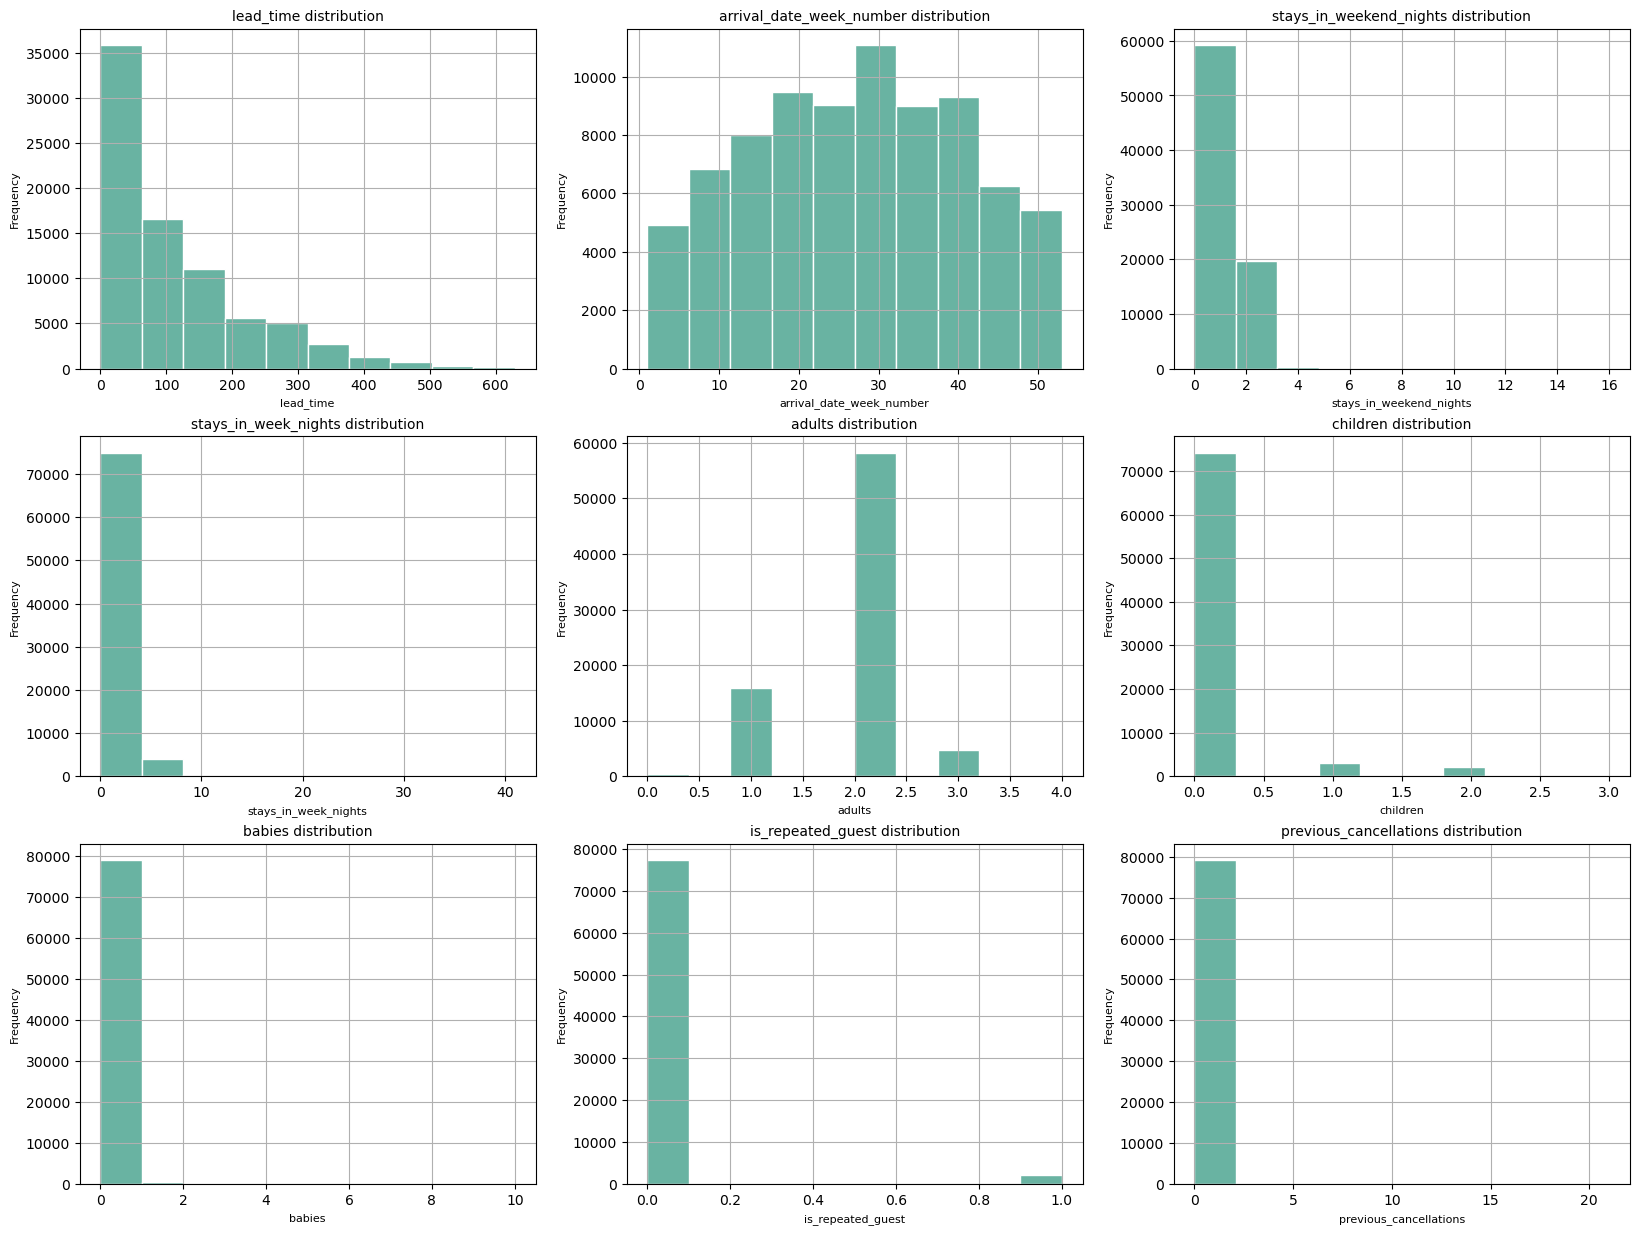

In [31]:
# Initialize a 3x3 grid of charts with a larger figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))  # Adjust figsize to your display

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(X_train_original_fe.columns):
    
    # Add the histogram
    df[column].hist(ax=axes[i],  # Define on which ax we're working on
                    edgecolor='white',  # Color of the border
                    color='#69b3a2'  # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution', fontsize=10)  # You can adjust fontsize as needed
    axes[i].set_xlabel(column, fontsize=8)  # Adjust fontsize as needed
    axes[i].set_ylabel('Frequency', fontsize=8)  # Adjust fontsize as needed

# Adjust layout to prevent overlap
plt.tight_layout(pad=5.0)  # Adjust padding
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing between subplots

# Show the plot
plt.show()

looks like skewed features needs transformation:

- log transformtaion (data is highly skewed):
    - "stays_in_weekend_nights","stays_in_week_nights","previous_bookings_not_canceled"
- square root transformation (data is moderately skewed):
    - "lead_time", "adr"

In [32]:
sqrt = ['lead_time','adr']
log = ['stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled']
drop_transformed_columns = sqrt + log

################################### Train Data ################################
for i in sqrt:
    colname = str(i) + 'sqrt'
    X_train_original_fe[colname] = np.sqrt(df[i])
for i in log:
    colname = str(i) +'_log'
    X_train_original_fe[colname] = np.log1p(df[i])

################################### Test Data ################################
for i in sqrt:
    colname = str(i) + 'sqrt'
    X_test_fe[colname] = np.sqrt(df[i])
for i in log:
    colname = str(i) +'_log'
    X_test_fe[colname] = np.log1p(df[i])
    
def drop_columns(df, drop_transformed_columns):
    df.drop(columns=drop_transformed_columns, inplace=True, errors='ignore')
    print("Updated DataFrame Shape:", df.shape)
    print("Updated Columns:\n", df.columns.tolist())
    
# Combine all columns to be dropped into a single list and drop them
drop_columns(X_train_original_fe, drop_transformed_columns)
drop_columns(X_test_fe, drop_transformed_columns)

Updated DataFrame Shape: (55527, 33)
Updated Columns:
 ['arrival_date_week_number', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests', 'meal_FB', 'meal_HB', 'meal_SC', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'is_holiday', 'is_weekend', 'got_reserved_room', 'lead_timesqrt', 'adrsqrt', 'stays_in_weekend_nights_log', 'stays_in_week_nights_log', 'previous_bookings_not_canceled_log']
Updated DataFrame Shape: (23798, 33)
Updated Columns:
 ['arrival_date_week_number', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'required_c

In [33]:
################################### kNN #########################################
pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))), # Normalize Data to 0~1
        ('knn', KNeighborsClassifier(p=2, metric='minkowski'))
      ])
pipe.fit(X_train_original_fe,Y_train)

knn_original_score = cross_val_score(pipe, X_train_original_fe, 
                                     Y_train, cv = 10, 
                                     scoring = "f1")  # f1 balances precision and recall -- providing a more comprehension view of model performance
print("kNN f1: %0.2f (+/- %0.2f)" % (knn_original_score.mean(), knn_original_score.std()))

################################### Decision Tree ################################
dt_original_score = cross_val_score(DecisionTreeClassifier(max_depth = 10),
                                    X_train_original_fe,
                                    Y_train,
                                    cv=10,
                                    scoring="f1")
print("Decision Tree f1: %0.2f (+/- %0.2f)" % (dt_original_score.mean(), dt_original_score.std()))

################################### Logistic Regression ################################
logistic_original_score = cross_val_score(LogisticRegression(),
                                          X_train_original_fe,
                                          Y_train,
                                          cv=10,
                                          scoring="f1")
print("Logistic Regression f1: %0.2f (+/- %0.2f)" % (logistic_original_score.mean(), logistic_original_score.std()))

kNN f1: 0.77 (+/- 0.00)
Decision Tree f1: 0.77 (+/- 0.01)
Logistic Regression f1: 0.74 (+/- 0.01)


Feature Engineering improved all 3 models' performances!

#### 2.2. Hyper parameter tuning

In [34]:
# k fold cross validation with shuffling -- good for randomizing data before creating folds
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
#Parameters to optimize
params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance'], 
    }

# Choosing Optimal Depth of tree & Optimal Splitting Criterion
gs_knn = GridSearchCV(estimator=pipe,
                    param_grid=params,
                    scoring='f1',
                    cv=inner_cv,
                    n_jobs=4)               # number of CPU cores to use when computing scores 1(default use 1 core) <-> -1 (use all cores)

gs_knn = gs_knn.fit(X_train_original_fe,Y_train)
print("\nParameter Tuning #1")

print("Non-nested CV f1: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_train_original_fe, y= Y_train, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

################################### Decision Tree ################################

gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                               'min_samples_leaf':[1, 2, 3, 4, 5, 6],
                               'criterion':['gini','entropy'],
                               'min_samples_split':[2,3,4,5]}],
                  scoring='f1',
                  cv=inner_cv)

gs_tree = gs_tree.fit(X_train_original_fe,Y_train)
print("\nParameter Tuning #2")
print("Non-nested CV f1: ", gs_tree.best_score_)
print("Optimal Parameter: ", gs_tree.best_params_)
print("Optimal Estimator: ", gs_tree.best_estimator_)
nested_score_gs_tree = cross_val_score(gs_tree, X=X_train_original_fe, y= Y_train, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_tree.mean(), " +/- ", nested_score_gs_tree.std())

################################## Logistic Regression ###########################

param_grid = [{'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
               'penalty': ['l1', 'l2']}]

# Create the GridSearchCV object
gs_log = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                     param_grid=param_grid,
                     scoring='f1',
                     cv=inner_cv)

gs_log = gs_log.fit(X_train_original_fe,Y_train)
print("\n Parameter Tuning #3")
print("Non-nested CV F1: ", gs_log.best_score_)
print("Optimal Parameter: ", gs_log.best_params_)
print("Optimal Estimator: ", gs_log.best_estimator_)
nested_score_gs_log = cross_val_score(gs_log, X=Y_train, y=Y_train, cv=outer_cv)
print("Nested CV F1:",nested_score_gs_log.mean(), " +/- ", nested_score_gs_log.std())


Parameter Tuning #1
Non-nested CV f1:  0.8057575859781215
Optimal Parameter:  {'knn__n_neighbors': 21, 'knn__weights': 'distance'}
Optimal Estimator:  Pipeline(steps=[('sc', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=21, weights='distance'))])
Nested CV f1:  0.8055672443104287  +/-  0.005101819747508161

Parameter Tuning #2
Non-nested CV f1:  0.7828331825195193
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', random_state=42)
Nested CV f1:  0.7818207080312602  +/-  0.005157174551802928

 Parameter Tuning #3
Non-nested CV F1:  0.7444170841301012
Optimal Parameter:  {'C': 100000, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=100000, random_state=42, solver='liblinear')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1419, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 875, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 414, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 130 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1419, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 875, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 414, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 130 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1419, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 875, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 414, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 130 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 898, in fit
    self._run_search(evaluate_candidates)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 1419, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py", line 875, in evaluate_candidates
    _warn_or_raise_about_fit_failures(out, self.error_score)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 414, in _warn_or_raise_about_fit_failures
    raise ValueError(all_fits_failed_message)
ValueError: 
All the 130 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1207, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/silvialee/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.



## 3. Model Application & Evaluation
- because feature engineering + hyper parameter tuning gave better performance on training data, we apply it to test

KNN Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     32359
           1       0.99      0.98      0.99     23168

    accuracy                           0.99     55527
   macro avg       0.99      0.99      0.99     55527
weighted avg       0.99      0.99      0.99     55527

KNN Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     13869
           1       0.87      0.77      0.82      9929

    accuracy                           0.86     23798
   macro avg       0.86      0.85      0.85     23798
weighted avg       0.86      0.86      0.86     23798

Decision Tree Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     32359
           1       0.99      0.96      0.98     23168

    accuracy                           0.98     55527
  

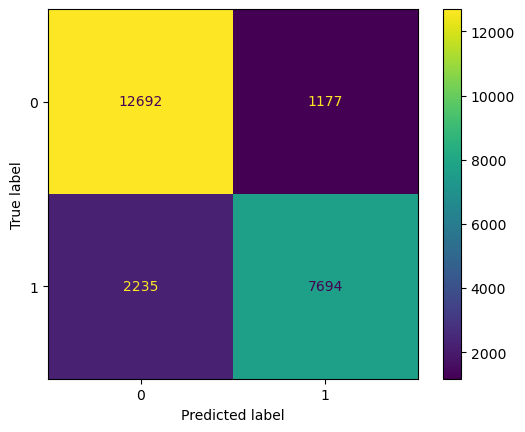

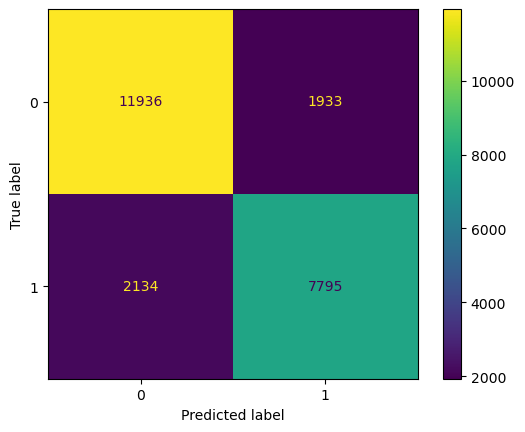

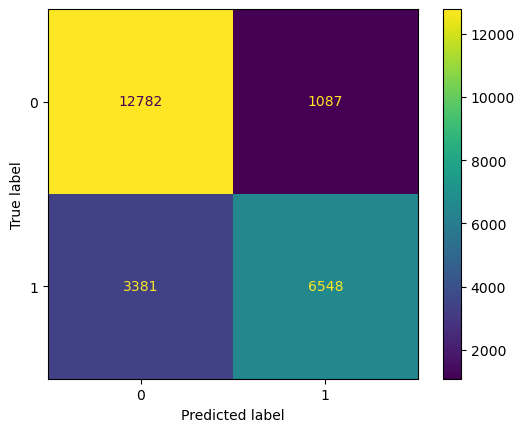

In [ ]:
import sklearn.metrics
################################### kNN #########################################

pipeknn = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=21,
                                    p=2,                 
                                    metric='minkowski', 
                                    n_jobs=-1,
                                    weights='distance')) 
                  ])

knn = pipeknn.fit(X_train_original_fe, Y_train)
predprobKnn = knn.predict_proba(X_test_fe)
predTrainKnn = knn.predict( X_train_original_fe )
predTestKnn = knn.predict( X_test_fe)
print("KNN Training Set Classification Report:")
print( sklearn.metrics.classification_report(Y_train, predTrainKnn))
print("KNN Test Set Classification Report:")
print( sklearn.metrics.classification_report(Y_test, predTestKnn))

cmKnn = sklearn.metrics.confusion_matrix(Y_test, predTestKnn)
plotCmKnn = sklearn.metrics.ConfusionMatrixDisplay( cmKnn, display_labels=knn.classes_ ).plot()

################################### Decision Tree ################################

trees = DecisionTreeClassifier(random_state=42,
                               min_samples_leaf = 1, 
                               min_samples_split = 3,
                               criterion = 'entropy')

tree = trees.fit(X_train_original_fe, Y_train)
predprobTrees = tree.predict_proba(X_test_fe)
predTrainTree = tree.predict(X_train_original_fe )
predTestTree = tree.predict(X_test_fe)
print("Decision Tree Training Set Classification Report:")
print( sklearn.metrics.classification_report(Y_train, predTrainTree ) )
print("Decision Tree Test Set Classification Report:")
print( sklearn.metrics.classification_report(Y_test, predTestTree ) )

cmTree = sklearn.metrics.confusion_matrix(Y_test, predTestTree )
plotCmTree = sklearn.metrics.ConfusionMatrixDisplay(cmTree, display_labels=tree.classes_ ).plot()

################################## Logistic Regression ###########################

pipeLogistic = Pipeline([
                ('sc', StandardScaler()),
                ('logit', LogisticRegression(penalty='l2', C = 1000 , solver='liblinear'))
                        ])
logit = pipeLogistic.fit(X_train_original_fe, Y_train)

predprobLogistic = logit.predict_proba(X_test_fe)
predTrainLogistic = logit.predict(X_train_original_fe)
predTestLogistic = logit.predict(X_test_fe)
print("Logistic Regression Training Set Classification Report:")
print( sklearn.metrics.classification_report(Y_train, predTrainLogistic ) )
print("Logistic Regression Test Set Classification Report:")
print( sklearn.metrics.classification_report(Y_test, predTestLogistic ) )

cmLogistic = sklearn.metrics.confusion_matrix(Y_test, predTestLogistic )
plotCmLogistic = sklearn.metrics.ConfusionMatrixDisplay( cmLogistic, display_labels=logit.classes_ ).plot()

10-fold cross validation:

ROC AUC: 0.87 (+/- 0.01) [Logistic regression]
ROC AUC: 0.81 (+/- 0.01) [Decision tree]
ROC AUC: 0.91 (+/- 0.01) [kNN]


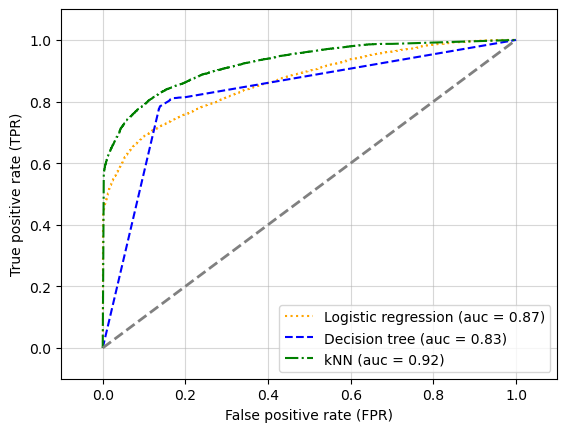

In [ ]:
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [logit, tree, knn]

print('10-fold cross validation:\n')
for clf, label in zip([logit, trees, pipeknn], clf_labels): #For all classifiers
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X_test_fe,
                             y=Y_test,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" # print performance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # colors for visualization
linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train_original_fe, Y_train).predict_proba(X_test_fe)[:, 1] # make predictions based on the classifiers

    fpr, tpr, thresholds = roc_curve(y_true=Y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC)
    plt.plot(fpr, tpr,                                
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')   
plt.plot([0, 1], [0, 1],        
         linestyle='--',     
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()